## Compute the sliding window over the fluctuation values

In [77]:
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5

def get_averaged_window_view(data, input):
    averaged_window_view = sliding_window_view(data, WINDOW_SIZE, axis=1).mean(axis=2)
    for i, dimension in enumerate(averaged_window_view.transpose()):
        if len(input) == i:
            input.append(dimension)
        elif len(input) > i:
            input[i] = np.concatenate((input[i], dimension))
        else:
            raise IndexError("This shouldn't happen")



def compute_windows(reverse_modes=False, range=None):
    binding_fluctuation_dimensions, nonbinding_fluctuation_dimensions = [], []
    proteins_count = 0
    # Load data from the fluctuation folder
    for filename in os.listdir(f'{FLUCTUATION_PATH}/fluctuation'):
        data = np.load(os.path.join(f'{FLUCTUATION_PATH}/fluctuation', filename))
        indices = np.load(os.path.join(f'{FLUCTUATION_PATH}/indices', filename))

        if range is not None:
            if len(data) < range[0] or len(data) > range[1]:
                continue
        
        binding_data = np.take(data, indices, axis=0)
        nonbinding_data = np.delete(data, indices, axis=0)
        
        if reverse_modes:
            binding_data = np.flip(binding_data, axis=1)
            nonbinding_data = np.flip(nonbinding_data, axis=1)
        
        get_averaged_window_view(binding_data, binding_fluctuation_dimensions)
        get_averaged_window_view(nonbinding_data, nonbinding_fluctuation_dimensions)

        proteins_count += 1
    return binding_fluctuation_dimensions, nonbinding_fluctuation_dimensions, proteins_count


def print_barcharts(binding_data, nonbinding_data, title='', limit=None):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    ylim = max(np.max(binding_medians), np.max(nonbinding_medians))
    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    plt.subplot(221)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')
    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(222)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')
    plt.title('Histogram of vedian values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(212)
    plt.bar(list(range(0, len(binding_medians))), binding_medians, width=1.0, label='Binding', alpha=0.5)
    plt.bar(list(range(0, len(nonbinding_medians))), nonbinding_medians, width=1.0, label='Nonbinding', alpha=0.5)
    plt.title('Combined Histogram of Median Values')
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)

    plt.legend()
    plt.tight_layout()
    plt.show()


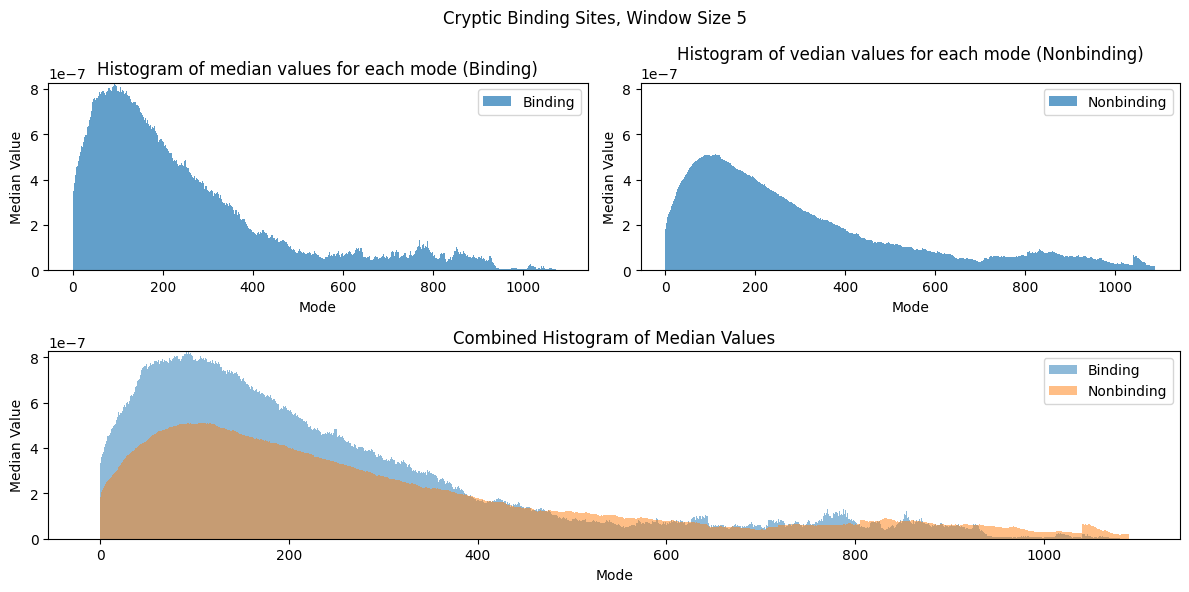

In [35]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count))

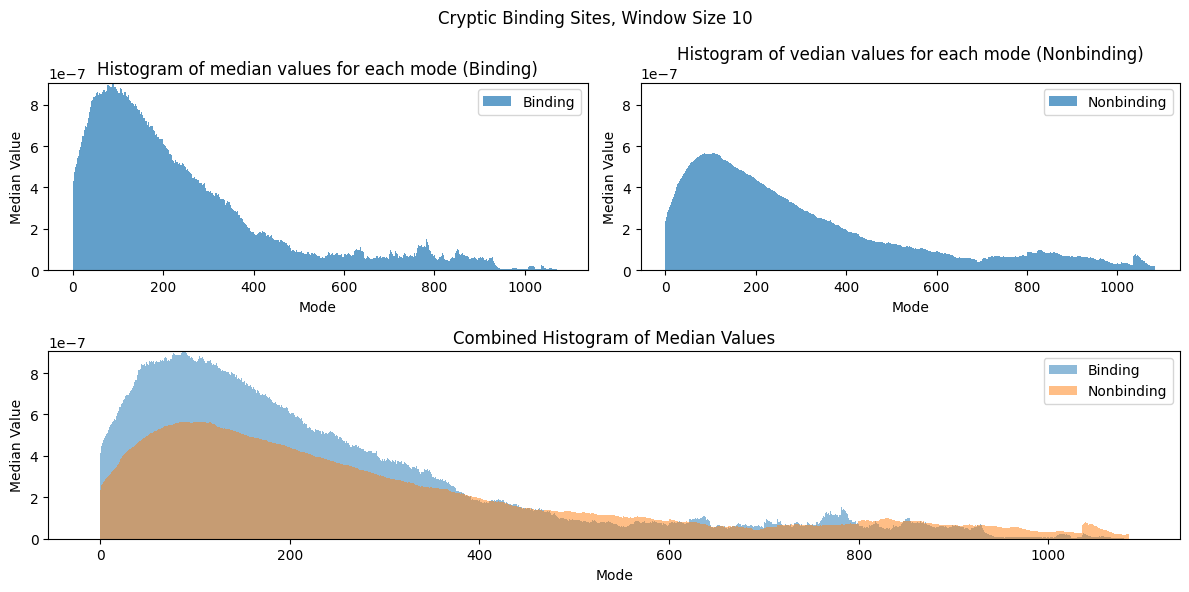

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 10
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 10, number of proteins: ' + str(count))

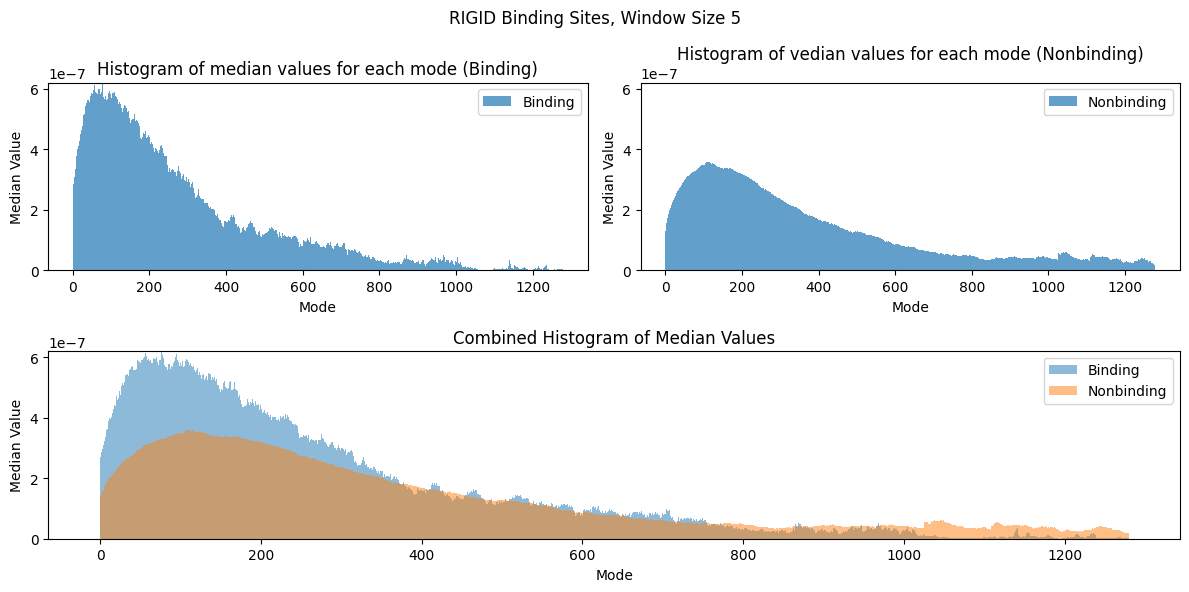

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count))

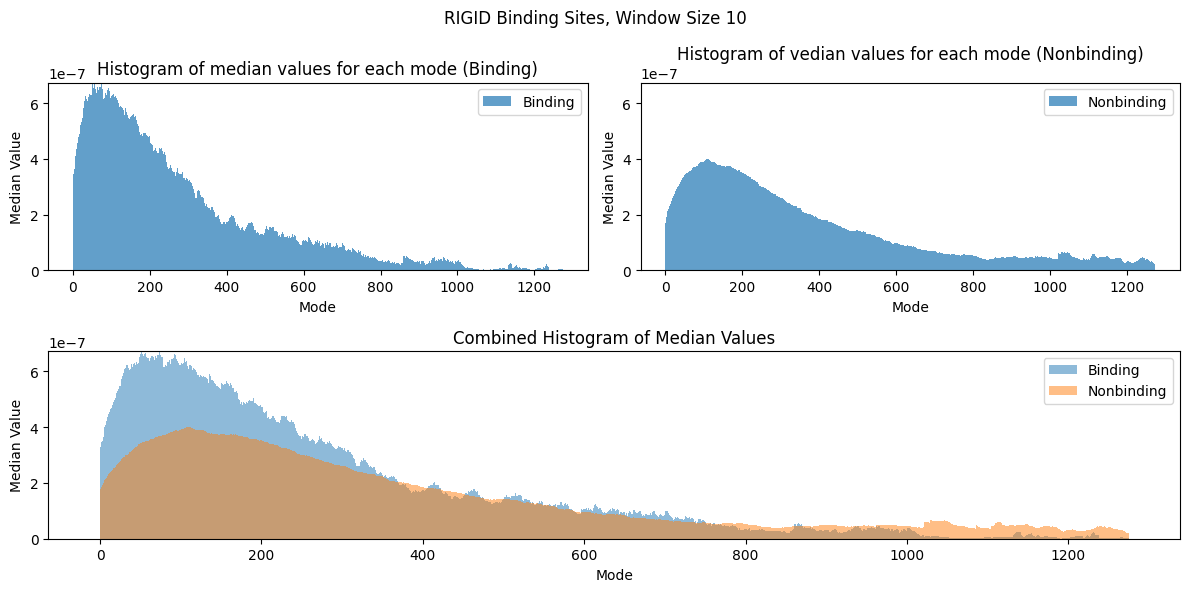

In [ ]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 10
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 10, number of proteins: ' + str(count))

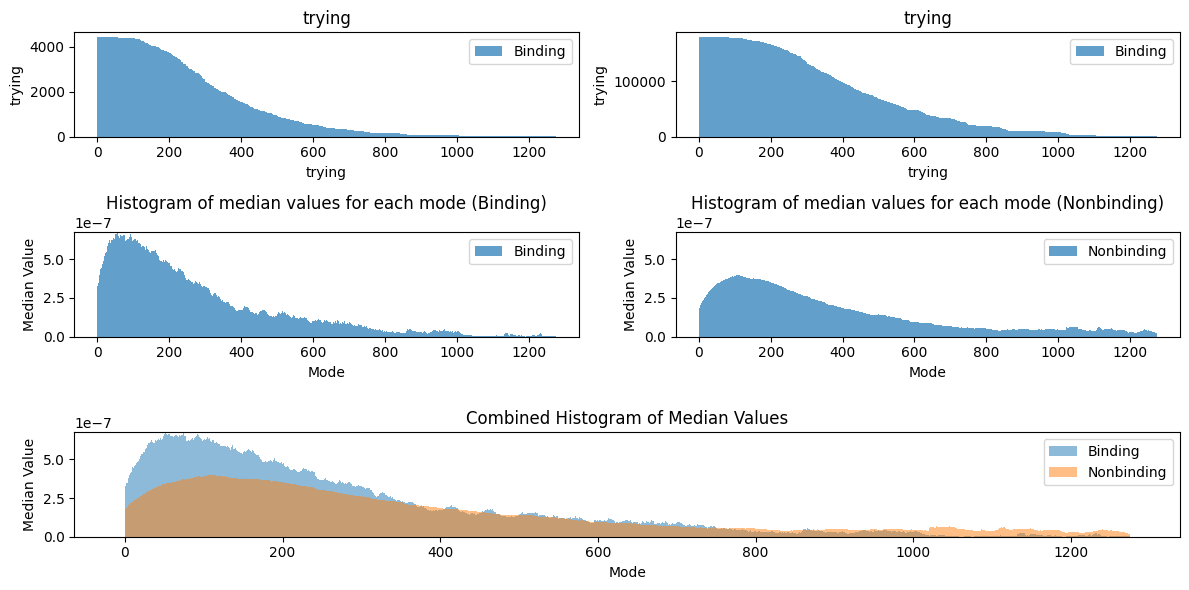

In [14]:
def print_barcharts_with_inset(binding_data, nonbinding_data):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    ylim = max(np.max(binding_medians), np.max(nonbinding_medians))
    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))

    plt.subplot(3,2,1)
    plt.bar(range(0, len(binding_medians)), [len(data) for data in binding_data], width=1.0, alpha=0.7, label='Binding')
    plt.title('trying')
    plt.xlabel('trying')
    plt.ylabel('trying')
    plt.legend()

    plt.subplot(3,2,2)
    plt.bar(range(0, len(binding_medians)), [len(data) for data in nonbinding_data], width=1.0, alpha=0.7, label='Binding')
    plt.title('trying')
    plt.xlabel('trying')
    plt.ylabel('trying')
    plt.legend()

    plt.subplot(3,2,3)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')
    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(3,2,4)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')
    plt.title('Histogram of median values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()

    plt.subplot(3,1,3)
    plt.bar(list(range(0, len(binding_medians))), binding_medians, width=1.0, label='Binding', alpha=0.5)
    plt.bar(list(range(0, len(nonbinding_medians))), nonbinding_medians, width=1.0, label='Nonbinding', alpha=0.5)
    plt.title('Combined Histogram of Median Values')
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.ylim(0, ylim)


    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with the existing data
print_barcharts_with_inset(binding_data_rigid, nonbinding_data_rigid, title='TBD')

# TODO: improve this: neco takoveho by bylo lepsi, tohle je trochu random: https://www.google.com/search?q=matplotlib:%20plotting%20histogram%20plot%20just%20above%20scatter%20plot
# TODO: zkusit prevratit poradi tech modu, jestli to trba nebude vypadat lip

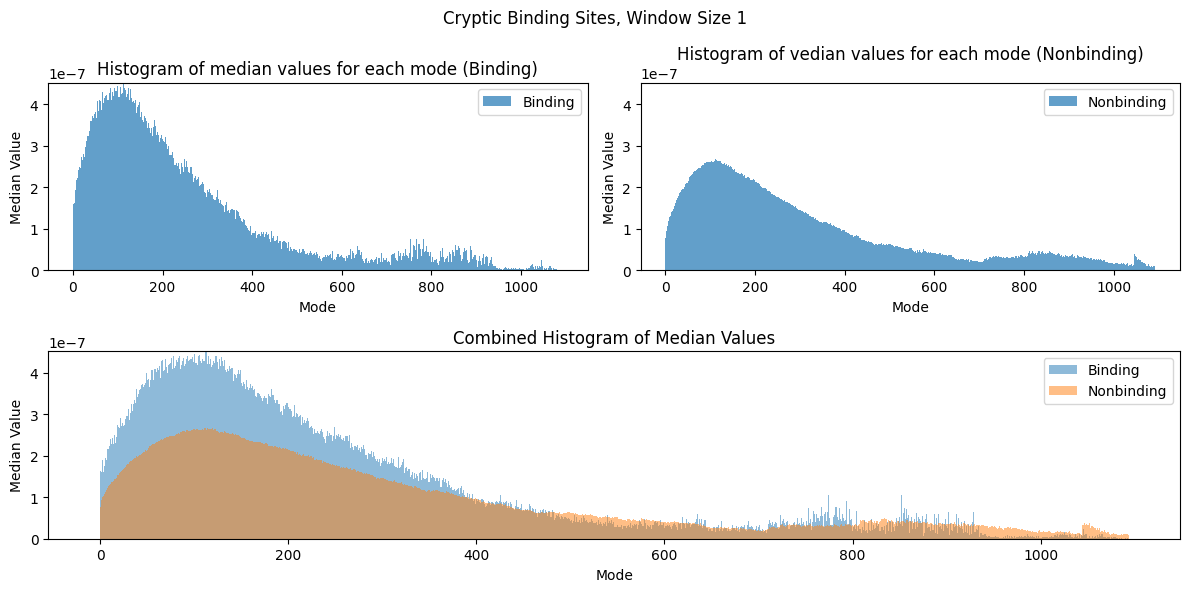

In [39]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 1
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 1, number of proteins: ' + str(count))

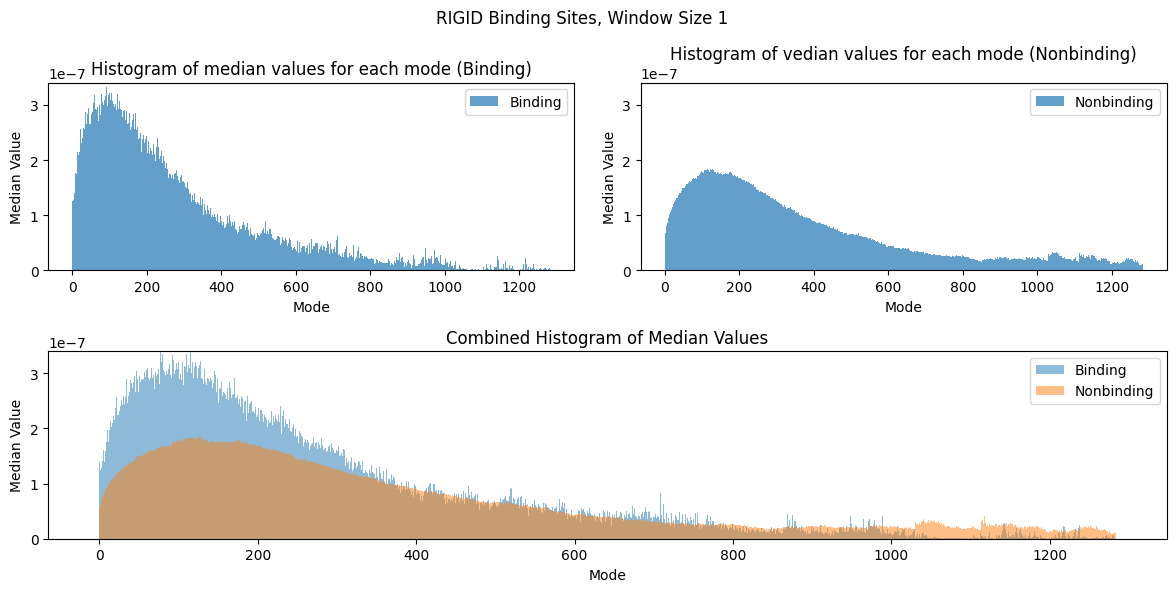

In [40]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 1
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='RIGID Binding Sites, Window Size 1, number of proteins: ' + str(count))

### Reverse the modes

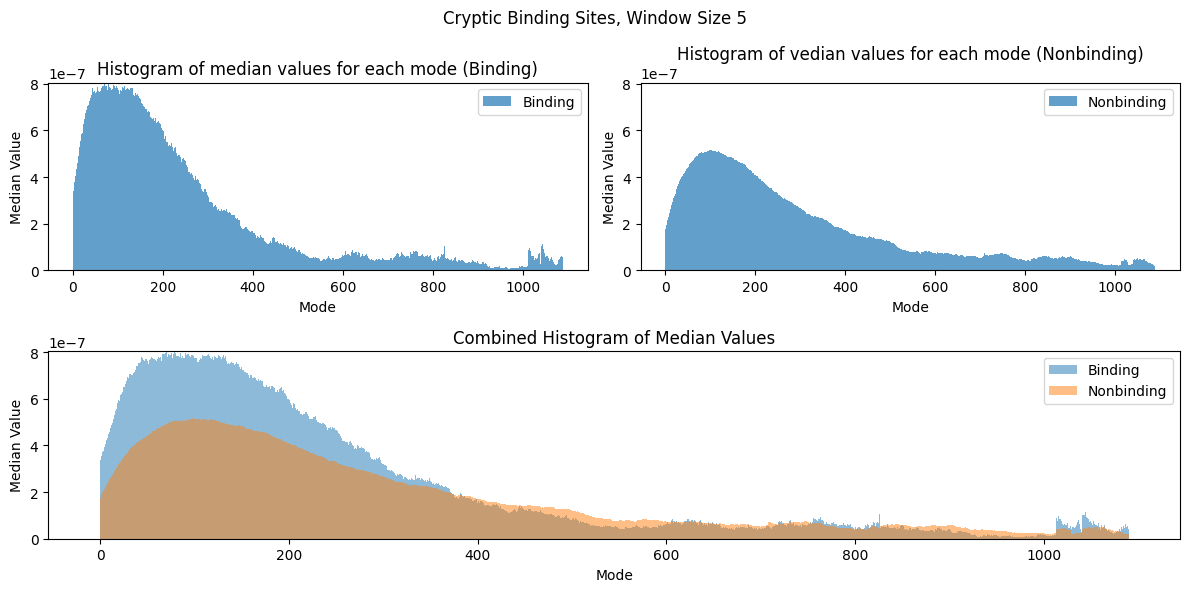

In [41]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(reverse_modes=True)
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count))

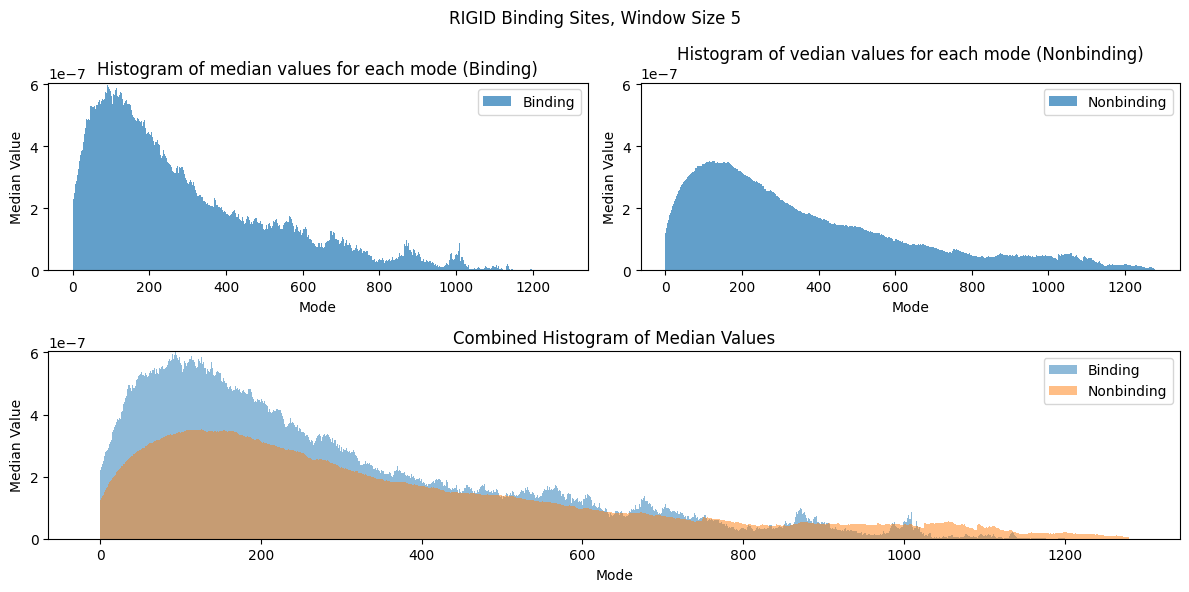

In [42]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True)
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count))

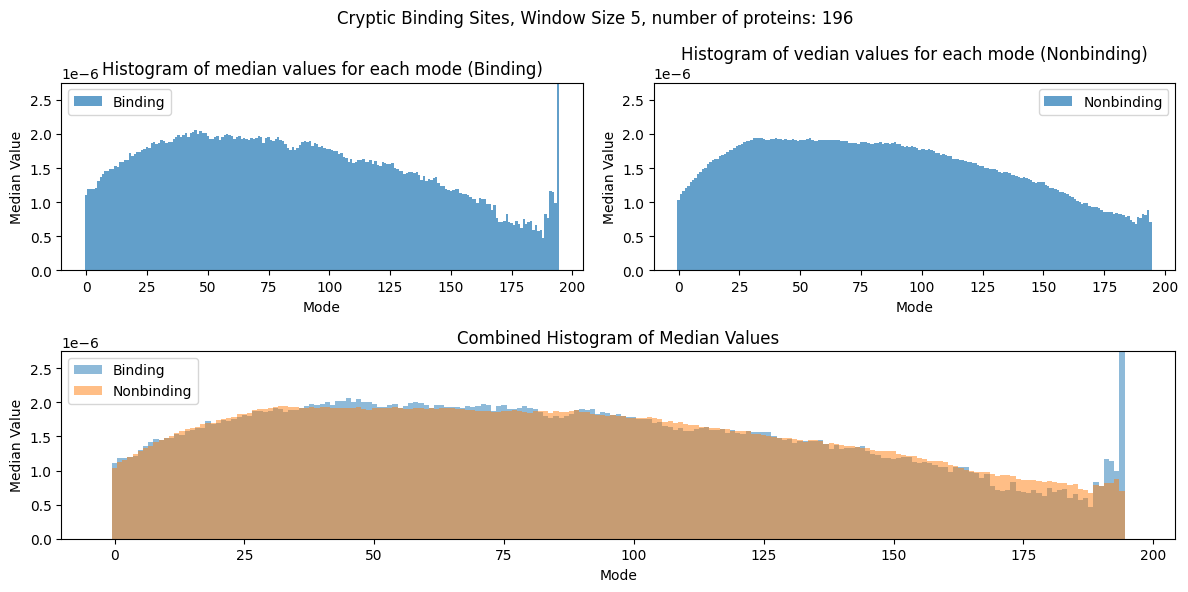

In [80]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(0, 200))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count))

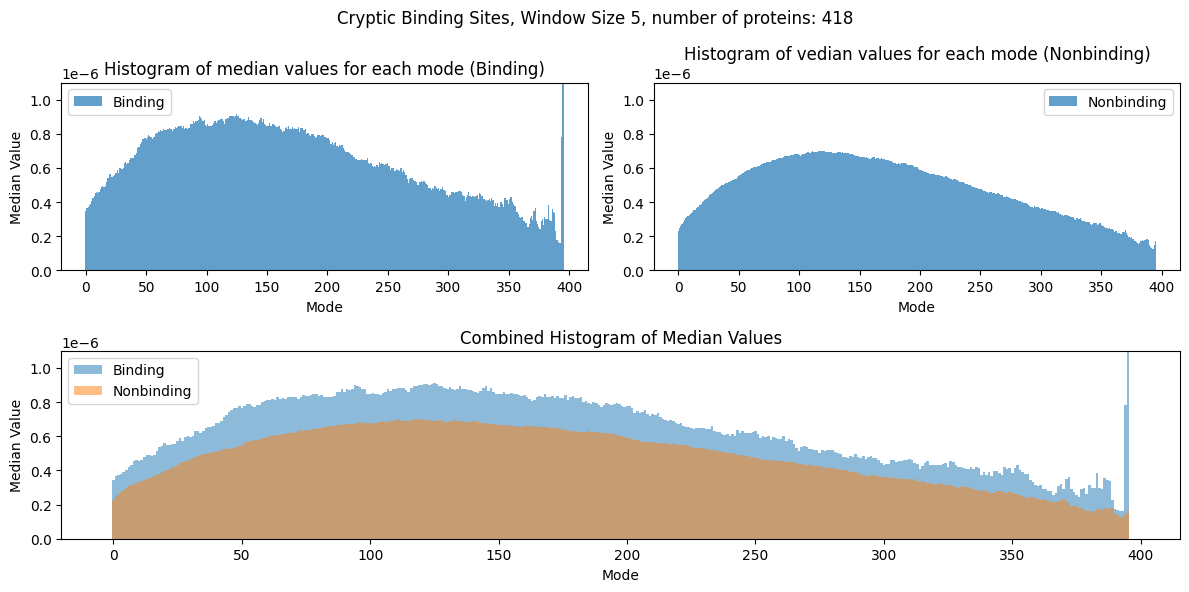

In [117]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(200,400))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=1.1e-06)

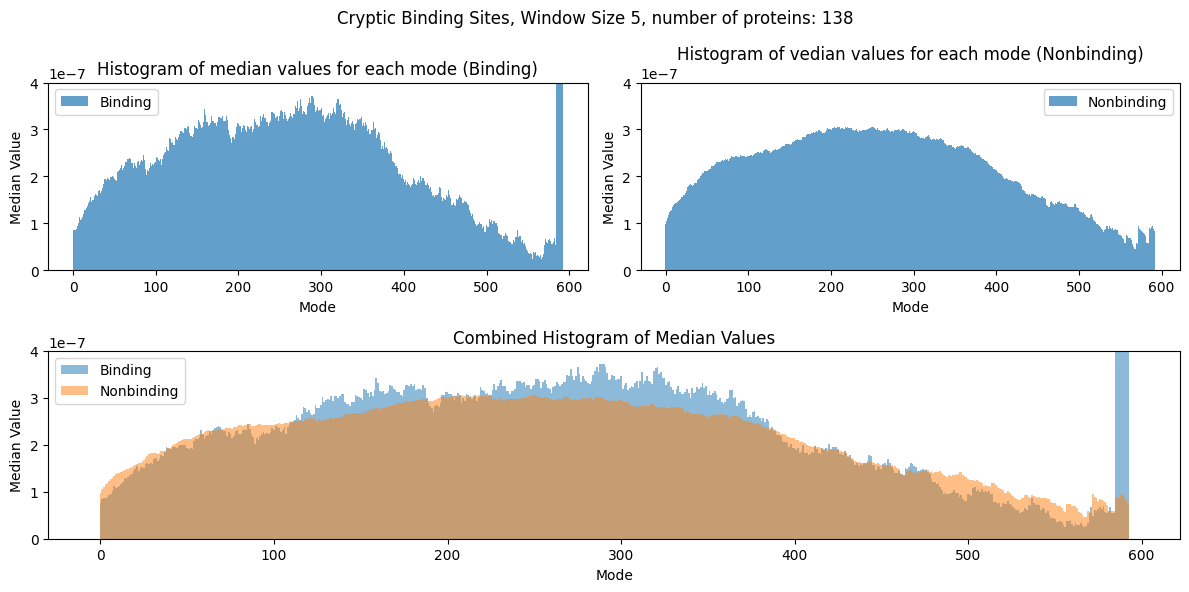

In [79]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(400,600))
print_barcharts(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=0.4e-06)

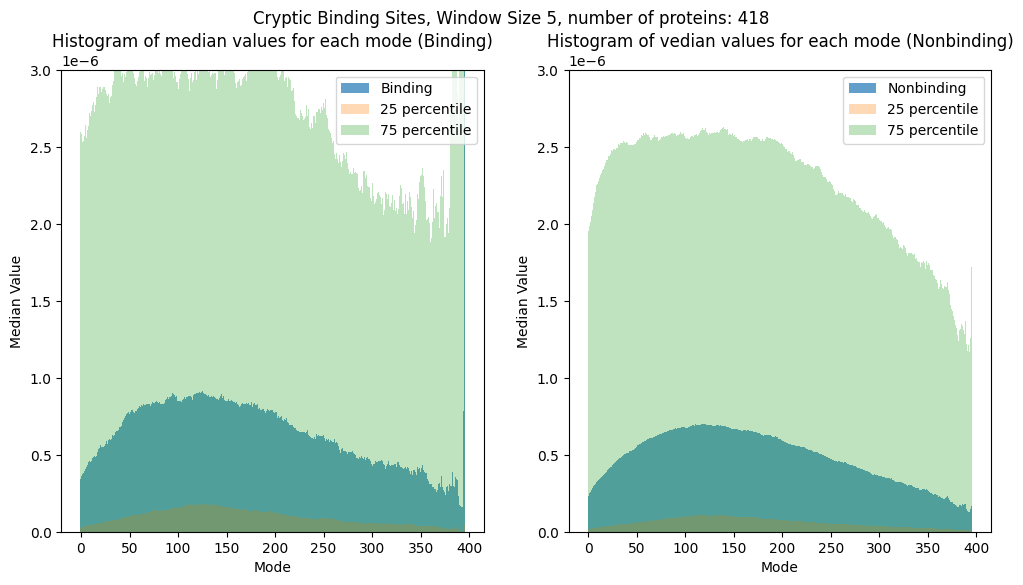

In [120]:
def print_barcharts_with_variance(binding_data, nonbinding_data, title='', limit=None):
    # Compute median values for each position
    binding_medians = [np.median(data) for data in binding_data]
    nonbinding_medians = [np.median(data) for data in nonbinding_data]

    ylim = max(np.max(binding_medians), np.max(nonbinding_medians))
    # Generate histograms of median values for each position
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    plt.subplot(121)
    plt.bar(range(0, len(binding_medians)), binding_medians, width=1.0, alpha=0.7, label='Binding')

    upper_binding_variance = [np.percentile(data, 75) for data in binding_data]
    lower_binding_variance = [np.percentile(data, 25) for data in binding_data]
    plt.bar(range(0, len(lower_binding_variance)), lower_binding_variance, width=1.0, alpha=0.3, label='25 percentile')
    plt.bar(range(0, len(upper_binding_variance)), upper_binding_variance, width=1.0, alpha=0.3, label='75 percentile')

    plt.title('Histogram of median values for each mode (Binding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()


    plt.subplot(122)
    plt.bar(range(0, len(nonbinding_medians)), nonbinding_medians, width=1.0, alpha=0.7, label='Nonbinding')

    upper_nonbinding_variance = [np.percentile(data, 75) for data in nonbinding_data]
    lower_nonbinding_variance = [np.percentile(data, 25) for data in nonbinding_data]
    plt.bar(range(0, len(lower_nonbinding_variance)), lower_nonbinding_variance, width=1.0, alpha=0.3, label='25 percentile')
    plt.bar(range(0, len(upper_nonbinding_variance)), upper_nonbinding_variance, width=1.0, alpha=0.3, label='75 percentile')

    plt.title('Histogram of vedian values for each mode (Nonbinding)')
    plt.xlabel('Mode')
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, ylim)
    plt.ylabel('Median Value')
    plt.legend()


FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows(range=(200, 400))
print_barcharts_with_variance(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=3e-06)

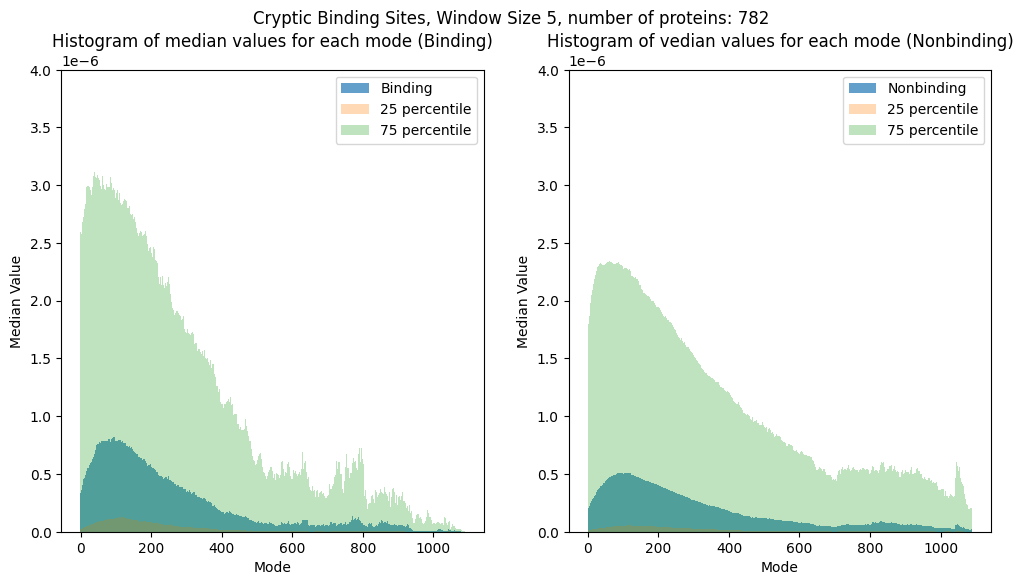

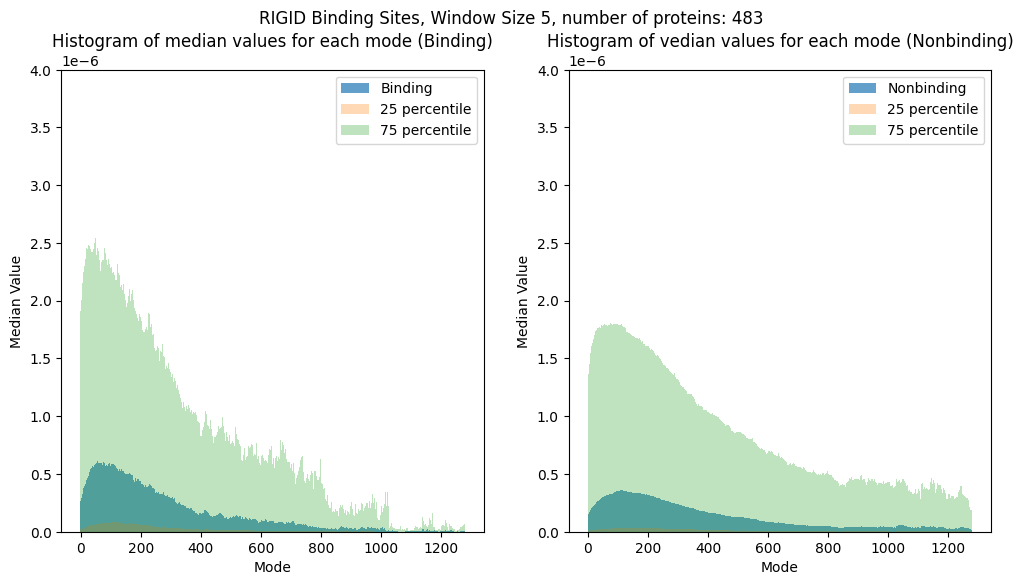

In [128]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/cryptobench-dataset'
WINDOW_SIZE = 5
binding_data_cryptic, nonbinding_data_cryptic, count = compute_windows()
print_barcharts_with_variance(binding_data_cryptic, nonbinding_data_cryptic, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
binding_data_rigid, nonbinding_data_rigid, count = compute_windows()
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

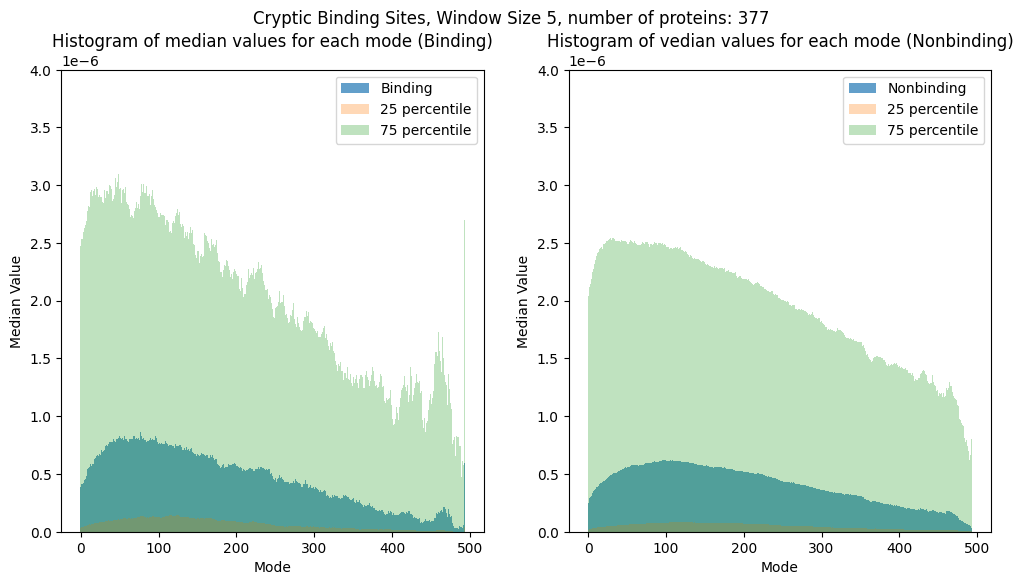

In [123]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(range=(0, 500))
print_barcharts_with_variance(binding_data_rigid, nonbinding_data_rigid, title='Cryptic Binding Sites, Window Size 5, number of proteins: ' + str(count), limit=4e-06)

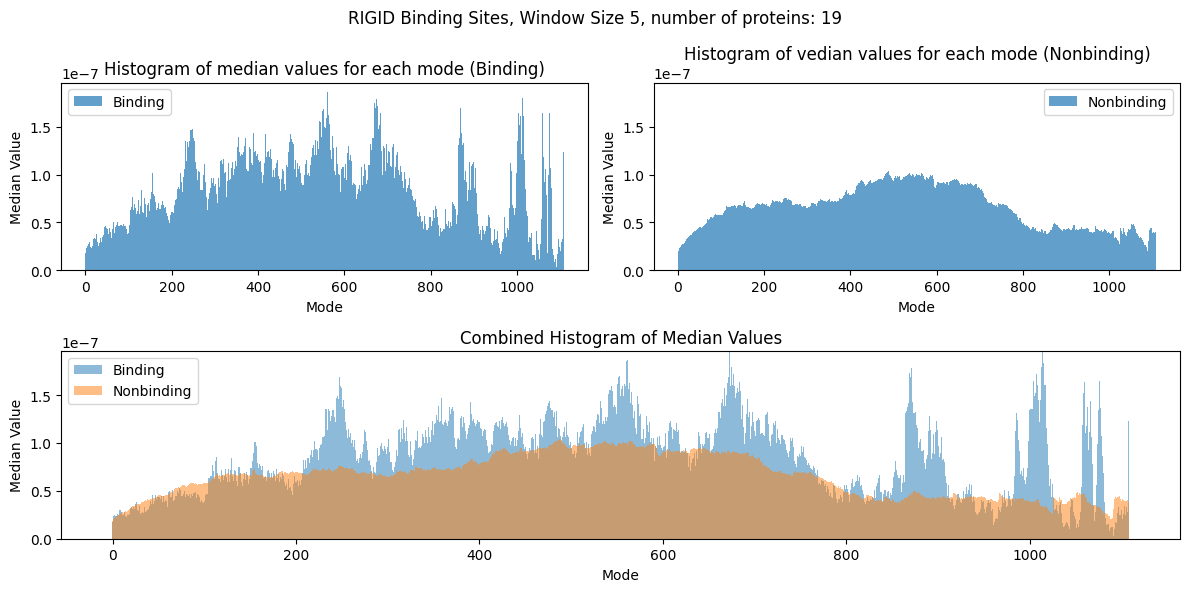

In [125]:
FLUCTUATION_PATH = '/home/vit/Projects/flexibility-analysis/data/features/fluctuation/rigid-dataset'
WINDOW_SIZE = 5
binding_data_rigid, nonbinding_data_rigid, count = compute_windows(reverse_modes=True, range=(800, 1200))
print_barcharts(binding_data_rigid, nonbinding_data_rigid, title='RIGID Binding Sites, Window Size 5, number of proteins: ' + str(count))

# TODO:
1. jak se to chova pro ruzne dlouhe proteiny? Bude stejny patern (patern ze po ~350 se da rozlisit mezi binding a non-binding) i u kratsich proteinu nebo je to jenom averaged pres vsechno a musi se to brat pro kazdou delku zvlast?
2. spocitat a zobrazit rozptyl pro kazdou value a mozna i nejak rozpadnout pro ruzne delky? protoze na tomhle grafu nebude nic videt. Nebo proste popremyslet jak tohle zobrazit aby to bylo koukatelne